##Recurrent Neural Network - LSTM for Temporal analysis of Mouse head direction



## Part 1 - Data Preprocessing

### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

In [2]:
dataset = pd.read_excel('Head position.xlsx')


In [99]:
len(dataset)

729633

In [3]:
dataset.head(2)

,Column1
0,66.193
1,66.193


In [8]:
training_set = dataset[0:600000]
test_set = dataset[600000:]

In [9]:
print(training_set)

        Column1
0        66.193
1        66.193
2        66.193
3        66.193
4        66.193
...         ...
599995  210.980
599996  212.620
599997  215.130
599998  215.180
599999  215.220

[600000 rows x 1 columns]


In [10]:
print(test_set)

        Column1
600000   215.26
600001   215.30
600002   215.35
600003   215.39
600004   215.43
...         ...
729628   158.65
729629   158.75
729630   158.84
729631   158.94
729632   159.03

[129633 rows x 1 columns]


### Feature Scaling

In [11]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [12]:
training_set_scaled.shape

(600000, 1)

### Creating a data structure with 60 timesteps and 1 output

In [13]:
X_train = []
y_train = []
for i in range(60, 600000):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [14]:
print(X_train)

[[0.18387455 0.18387455 0.18387455 ... 0.19646101 0.19698325 0.19750271]
 [0.18387455 0.18387455 0.18387455 ... 0.19698325 0.19750271 0.19945832]
 [0.18387455 0.18387455 0.18387455 ... 0.19750271 0.19945832 0.20249729]
 ...
 [0.55701547 0.55945998 0.56187672 ... 0.58479402 0.58607184 0.59062752]
 [0.55945998 0.56187672 0.56432123 ... 0.58607184 0.59062752 0.59759993]
 [0.56187672 0.56432123 0.56676574 ... 0.59062752 0.59759993 0.59773883]]


In [15]:
print(y_train)

[0.19945832 0.20249729 0.20249729 ... 0.59759993 0.59773883 0.59784994]


### Reshaping

In [16]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [17]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialising the RNN

In [18]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [19]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

### Adding a second LSTM layer and some Dropout regularisation

In [20]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [21]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [22]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

### Adding the output layer

In [23]:
regressor.add(Dense(units = 1))

### Compiling the RNN

In [25]:
regressor.compile(optimizer = 'adam', loss = 'mean_absolute_error')

### Fitting the RNN to the Training set

In [27]:
regressor.fit(X_train, y_train, epochs = 5, batch_size = 64)

Epoch 1/5
9375/9375 [==============================] - 1110s 118ms/step - loss: 0.0194
Epoch 2/5
9375/9375 [==============================] - 1233s 132ms/step - loss: 0.0163
Epoch 3/5
9375/9375 [==============================] - 1229s 131ms/step - loss: 0.0155
Epoch 4/5
9375/9375 [==============================] - 1240s 132ms/step - loss: 0.0153
Epoch 5/5
9375/9375 [==============================] - 1223s 130ms/step - loss: 0.0151


In [29]:
print(test_set.shape)

(129633, 1)


In [33]:
print(dataset.head)

<bound method NDFrame.head of         Column1
0        66.193
1        66.193
2        66.193
3        66.193
4        66.193
...         ...
729628  158.650
729629  158.750
729630  158.840
729631  158.940
729632  159.030

[729633 rows x 1 columns]>


In [46]:
print(len(dataset))

729633


In [47]:
print(len(test_set))

129633


In [50]:
print(training_set.shape)

(600000, 1)


## Part 3 - Making the predictions and visualising the results

### Predicting Mouse head position for Test set

In [59]:
training_set = training_set.flatten()
test_set = test_set.flatten()

In [67]:
training_set = pd.DataFrame(training_set)

In [69]:
test_set = pd.DataFrame(test_set)

In [101]:
dataset_total = pd.concat((training_set[0], test_set[0]), axis = 0)
inputs = dataset_total[len(dataset_total) - len(test_set) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 129693):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_head_position = regressor.predict(X_test)
predicted_head_position = sc.inverse_transform(predicted_head_position)

In [102]:
print(len(training_set))

600000


In [103]:
print(len(dataset_total))

729633


In [104]:
print(len(X_test))

129633


In [105]:
print(X_test.shape)

(129633, 60, 1)


In [110]:
print(test_set.shape)

(129633, 1)


In [108]:
print(len(predicted_head_position))

129633


### Visualising the results

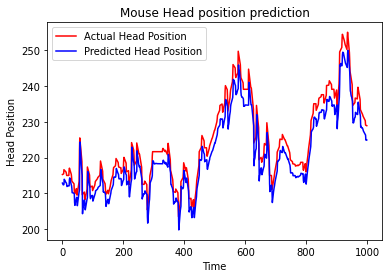

In [113]:
plt.plot(test_set[0:1000], color = 'red', label = 'Actual Head Position')
plt.plot(predicted_head_position[0:1000], color = 'blue', label = 'Predicted Head Position')
plt.title('Mouse Head position prediction')
plt.xlabel('Time')
plt.ylabel('Head Position')
plt.legend()
plt.show()

In [111]:
test_set = np.array(test_set)
np.set_printoptions(precision=2)
print(np.concatenate((test_set.reshape(len(test_set),1),predicted_head_position.reshape(len(predicted_head_position),1)),1))

[[215.26 212.86]
 [215.3  212.7 ]
 [215.35 212.45]
 ...
 [158.84 159.97]
 [158.94 160.12]
 [159.03 160.27]]


In [115]:
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(test_set, predicted_head_position)
print("Multiple linear regression MAE = ", MAE)

Multiple linear regression MAE =  3.405339376325202


In [116]:
from sklearn.metrics import r2_score
r2_score(predicted_head_position, predicted_head_position)

1.0